<a href="https://colab.research.google.com/github/PascalAdriantha/Sentiment-Analysis/blob/main/Sentiment_Analysis_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.0 MB/s eta 0:00:00


In [ ]:
!python --version

Python 3.10.12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datasetAwal = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Textblob Data/Data_TextBlobed_10000.csv")##[["tweets","labels"]]
dataset = datasetAwal.head(3000)

In [ ]:
dataset

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",positive
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",positive
4,"As of 2 minutes ago, @OpenAI released their ne...",positive
...,...,...
2995,ChatGPT https://t.co/heMojw0JUe,neutral
2996,Not sure if large language models are sentient...,positive
2997,I'm dead #ChatGPT https://t.co/KzQ2EjTlWb,negative
2998,ChatGPT is a typical whataboutist. Next! https...,negative


In [ ]:
dataset["labels"] = dataset["labels"].replace('negative',0)
dataset["labels"] = dataset["labels"].replace('neutral', 1)
dataset["labels"] = dataset["labels"].replace('positive', 2)

<ipython-input-7-443c9ffb1f6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["labels"] = dataset["labels"].replace('negative',0)
<ipython-input-7-443c9ffb1f6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["labels"] = dataset["labels"].replace('neutral', 1)
<ipython-input-7-443c9ffb1f6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [ ]:
#create cleansing function

def cleanTweets(text):
  text = re.sub(r'@[A-Za-z0-9]+','', text) #menghapus mentions
  text = re.sub(r'#','', text) #menghapus hashtag
  text = re.sub(r'RT[\s]+','', text) #menghapus RT
  text = re.sub(r'https?:\/\/\S+','', text) #menghapus links
  text = re.sub('[^a-zA-Z]', ' ', text).lower() #mengubah huruf kecil, menghapus tanda baca dan simbol
  return text

dataset['Cleaned Tweets'] = dataset['tweets'].apply(cleanTweets)

dataset[["tweets", "Cleaned Tweets"]]

<ipython-input-8-cfca84ea98e4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cleaned Tweets'] = dataset['tweets'].apply(cleanTweets)


,tweets,Cleaned Tweets
0,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language models for dialog...
1,"Try talking with ChatGPT, our new AI system wh...",try talking with chatgpt our new ai system wh...
2,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language models for dialog...
3,"THRILLED to share that ChatGPT, our new model ...",thrilled to share that chatgpt our new model ...
4,"As of 2 minutes ago, @OpenAI released their ne...",as of minutes ago released their new chatg...
...,...,...
2995,ChatGPT https://t.co/heMojw0JUe,chatgpt
2996,Not sure if large language models are sentient...,not sure if large language models are sentient...
2997,I'm dead #ChatGPT https://t.co/KzQ2EjTlWb,i m dead chatgpt
2998,ChatGPT is a typical whataboutist. Next! https...,chatgpt is a typical whataboutist next


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def tokenizeTweet(text):
  tokenizedTweet = text.split()
  return tokenizedTweet
dataset['Tokenized'] = dataset['Cleaned Tweets'].apply(lambda x: tokenizeTweet(x))

<ipython-input-10-268bb53e51f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Tokenized'] = dataset['Cleaned Tweets'].apply(lambda x: tokenizeTweet(x))


In [ ]:
dataset[["Cleaned Tweets", "Tokenized"]].head(25)

,Cleaned Tweets,Tokenized
0,chatgpt optimizing language models for dialog...,"[chatgpt, optimizing, language, models, for, d..."
1,try talking with chatgpt our new ai system wh...,"[try, talking, with, chatgpt, our, new, ai, sy..."
2,chatgpt optimizing language models for dialog...,"[chatgpt, optimizing, language, models, for, d..."
3,thrilled to share that chatgpt our new model ...,"[thrilled, to, share, that, chatgpt, our, new,..."
4,as of minutes ago released their new chatg...,"[as, of, minutes, ago, released, their, new, c..."
5,just launched chatgpt our new ai system which...,"[just, launched, chatgpt, our, new, ai, system..."
6,as of minutes ago released their new chatg...,"[as, of, minutes, ago, released, their, new, c..."
7,chatgpt coming out strong refusing to help me ...,"[chatgpt, coming, out, strong, refusing, to, h..."
8,penal just deployed a thing i ve been helping...,"[penal, just, deployed, a, thing, i, ve, been,..."
9,research preview of our newest model chatgpt ...,"[research, preview, of, our, newest, model, ch..."


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = nltk.stem.WordNetLemmatizer()
def stopword_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])


dataset['Lemmatized and Stopword'] = dataset['Tokenized'].apply(lambda x: stopword_text(x))

from nltk.stem import WordNetLemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)
dataset['Lemmatized and Stopword'] = dataset['Lemmatized and Stopword'].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
<ipython-input-13-4f50e36f3e5d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Lemmatized and Stopword'] = dataset['Tokenized'].apply(lambda x: stopword_text(x))
<ipython-input-13-4f50e36f3e5d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Lemmatized and Stopword'] = dataset['Lemmatized and Stopword'].apply(lemmatize_words)


In [ ]:
dataset[["Tokenized", "Lemmatized and Stopword"]].head(25)

,Tokenized,Lemmatized and Stopword
0,"[chatgpt, optimizing, language, models, for, d...",chatgpt optimize language model dialogue
1,"[try, talking, with, chatgpt, our, new, ai, sy...",try talk chatgpt new ai system optimize dialog...
2,"[chatgpt, optimizing, language, models, for, d...",chatgpt optimize language model dialogue ai ma...
3,"[thrilled, to, share, that, chatgpt, our, new,...",thrill share chatgpt new model optimize dialog...
4,"[as, of, minutes, ago, released, their, new, c...",minute ago release new chatgpt n nand use right
5,"[just, launched, chatgpt, our, new, ai, system...",launch chatgpt new ai system optimize dialogue
6,"[as, of, minutes, ago, released, their, new, c...",minute ago release new chatgpt n nand use righ...
7,"[chatgpt, coming, out, strong, refusing, to, h...",chatgpt come strong refuse help stalk someone ...
8,"[penal, just, deployed, a, thing, i, ve, been,...",penal deploy thing help build last couple mont...
9,"[research, preview, of, our, newest, model, ch...",research preview newest model chatgpt n nwe tr...


In [ ]:
datasetNegative = dataset[ (dataset['labels']==0)]
datasetPositive = dataset[ (dataset['labels']==2)]

negativeList = datasetNegative['Lemmatized and Stopword'].tolist()
positiveList = datasetPositive['Lemmatized and Stopword'].tolist()

filtered_negative = ("").join(str(datasetNegative)) #convert the list into a string of spam
#filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(datasetPositive)) #convert the list into a string of spam
#filtered_positive = filtered_positive.lower()

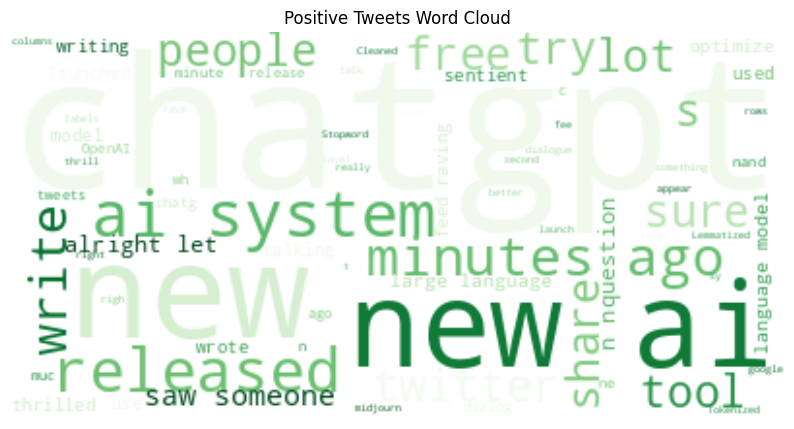

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Tweets Word Cloud")
plt.show()

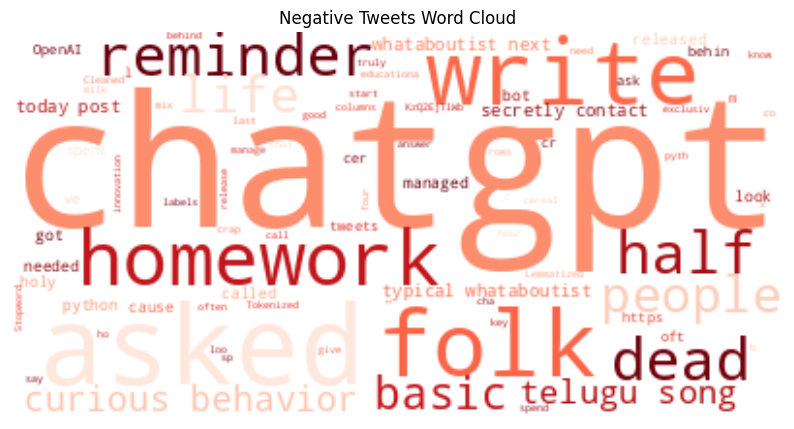

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Tweets Word Cloud")
plt.show()

In [ ]:
x = list(dataset['Lemmatized and Stopword'])
y = list(dataset['labels'])

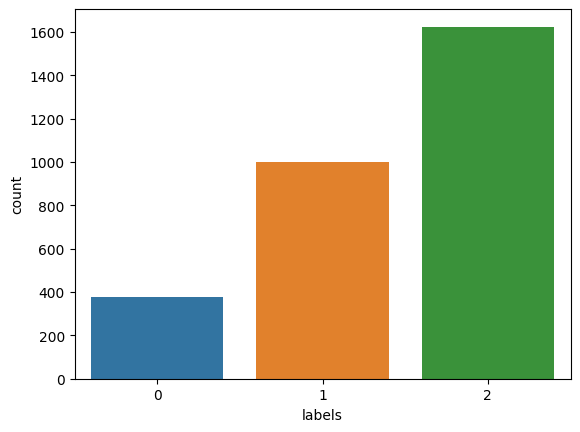

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='labels', data=dataset);

In [ ]:
dataset

,tweets,labels,Cleaned Tweets,Tokenized,Lemmatized and Stopword
0,ChatGPT: Optimizing Language Models for Dialog...,1,chatgpt optimizing language models for dialog...,"[chatgpt, optimizing, language, models, for, d...",chatgpt optimize language model dialogue
1,"Try talking with ChatGPT, our new AI system wh...",2,try talking with chatgpt our new ai system wh...,"[try, talking, with, chatgpt, our, new, ai, sy...",try talk chatgpt new ai system optimize dialog...
2,ChatGPT: Optimizing Language Models for Dialog...,1,chatgpt optimizing language models for dialog...,"[chatgpt, optimizing, language, models, for, d...",chatgpt optimize language model dialogue ai ma...
3,"THRILLED to share that ChatGPT, our new model ...",2,thrilled to share that chatgpt our new model ...,"[thrilled, to, share, that, chatgpt, our, new,...",thrill share chatgpt new model optimize dialog...
4,"As of 2 minutes ago, @OpenAI released their ne...",2,as of minutes ago released their new chatg...,"[as, of, minutes, ago, released, their, new, c...",minute ago release new chatgpt n nand use right
...,...,...,...,...,...
2995,ChatGPT https://t.co/heMojw0JUe,1,chatgpt,[chatgpt],chatgpt
2996,Not sure if large language models are sentient...,2,not sure if large language models are sentient...,"[not, sure, if, large, language, models, are, ...",not sure large language model sentient appear ...
2997,I'm dead #ChatGPT https://t.co/KzQ2EjTlWb,0,i m dead chatgpt,"[i, m, dead, chatgpt]",dead chatgpt
2998,ChatGPT is a typical whataboutist. Next! https...,0,chatgpt is a typical whataboutist next,"[chatgpt, is, a, typical, whataboutist, next]",chatgpt typical whataboutist next


In [ ]:
labels = dataset.labels.values  
sentences = dataset['Lemmatized and Stopword'].values

In [ ]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [ ]:
dataset.sample(5)

,tweets,labels,Cleaned Tweets,Tokenized,Lemmatized and Stopword
1402,ChatGPT teaches you how to use my Sign in with...,1,chatgpt teaches you how to use my sign in with...,"[chatgpt, teaches, you, how, to, use, my, sign...",chatgpt teach use sign apple library node j ex...
2403,This thread including images are all created b...,2,this thread including images are all created b...,"[this, thread, including, images, are, all, cr...",thread include image create story via chatgpt ...
1342,What should I say to ChatGPT?,1,what should i say to chatgpt,"[what, should, i, say, to, chatgpt]",say chatgpt
2151,#OpenAI #ChatGPT supports my challenge to #sim...,1,openai chatgpt supports my challenge to simula...,"[openai, chatgpt, supports, my, challenge, to,...",openai chatgpt support challenge simulatedreal...
1608,"No, #ChatGPT, the behavior of signed integer o...",2,no chatgpt the behavior of signed integer ov...,"[no, chatgpt, the, behavior, of, signed, integ...",chatgpt behavior sign integer overflow c not d...


In [ ]:
print("Original: ", sentences[0])

print("Tokenized: ", tokenizer.tokenize(sentences[0]))

print("Token IDS: ", tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

Original:  chatgpt optimize language model dialogue
Tokenized:  ['chat', '##gp', '##t', 'opt', '##imi', '##ze', 'language', 'model', 'dialogue']
Token IDS:  [11834, 21600, 2102, 23569, 27605, 4371, 2653, 2944, 7982]


In [ ]:
input_ids = []

for sent in sentences:
  encoded_sent = tokenizer.encode(
      sent,
      add_special_tokens = True
  )
  input_ids.append(encoded_sent)
  
print("Original: ", sentences[0])
print("Token IDs: ", input_ids[0])


Original:  chatgpt optimize language model dialogue
Token IDs:  [101, 11834, 21600, 2102, 23569, 27605, 4371, 2653, 2944, 7982, 102]


In [ ]:
print("Max sentence length: ", max([len(sen) for sen in input_ids]))

Max sentence length:  72


In [ ]:
!pip install Keras-Preprocessing
from keras_preprocessing.sequence import pad_sequences

MAX_LEN = 70

print("Padding/truncating all sentences to %d values" % MAX_LEN)
print('Padding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype='long', value=0, truncating='post', padding='post')

print("Done")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.3 MB/s eta 0:00:00
Padding/truncating all sentences to 70 values
Padding token: "[PAD]", ID: 0
Done


In [ ]:
input_ids[0]

array([  101, 11834, 21600,  2102, 23569, 27605,  4371,  2653,  2944,
        7982,   102,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0])

In [ ]:
attention_mask = []

for sent in input_ids:
  att_mask = [int(token_id > 0) for token_id in sent]

  attention_mask.append(att_mask)

## Persiapan Data

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_labels, test_labels = train_test_split(input_ids,
                                                                      labels,
                                                                      random_state=2017,
                                                                      test_size=0.2)
train_mask, test_mask, _, _ = train_test_split(attention_mask,
                                               labels,
                                               random_state=2017,
                                               test_size=0.2)

train_input, validation_input, train_labels, validation_labels = train_test_split(train_input,
                                                                                  train_labels,
                                                                                  random_state=2018,
                                                                                  test_size=0.15)
train_mask, validation_mask, _, _ = train_test_split(train_mask,
                                                     train_mask,
                                                     random_state=2018,
                                                     test_size=0.15)

In [ ]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(sampling_strategy="not majority")
temp = train_labels
train_input, train_labels = ROS.fit_resample(train_input, train_labels)

train_mask,  temp= ROS.fit_resample(train_mask, temp)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#from collections import Counter
#Counter(y_train_ros)

In [ ]:
#X_train_ros, validation_input, y_train_ros, validation_labels = train_test_split(X_train_ros,
#                                                                                  y_train_ros,
#                                                                                  random_state=2018,
#                                                                                  test_size=0.15)
#train_mask, validation_mask, _, _ = train_test_split(train_mask,
#                                                     train_mask,
#                                                     random_state=2018,
#                                                     test_size=0.15)

In [ ]:
 import numpy as np
print("== Train ==")
print("Input: ", train_input.shape)
print("Label: ", train_labels.shape)
print("Mask: ", np.array(train_mask).shape)

print("\n== Validation ==")
print("Input: ", validation_input.shape)
print("Label: ", validation_labels.shape)
print("Mask: ", np.array(validation_mask).shape)

print("\n== Test ==")
print("Input: ", test_input.shape)
print("Label: ", test_labels.shape)
print("Mask: ", np.array(test_mask).shape)

== Train ==
Input:  (3315, 70)
Label:  (3315,)
Mask:  (3315, 70)

== Validation ==
Input:  (360, 70)
Label:  (360,)
Mask:  (360, 70)

== Test ==
Input:  (600, 70)
Label:  (600,)
Mask:  (600, 70)


In [ ]:
import torch

train_input = torch.tensor(train_input)
train_labels = torch.tensor(train_labels)
train_mask = torch.tensor(train_mask)

validation_input = torch.tensor(validation_input)
validation_labels = torch.tensor(validation_labels)
validation_mask = torch.tensor(validation_mask)

test_input = torch.tensor(test_input)
test_labels = torch.tensor(test_labels)
test_mask = torch.tensor(test_mask)

In [ ]:
#import tensorflow as tf
#X_train_tf = torch.from_numpy(X_train_ros)
#y_train_tf = torch.from_numpy(y_train_ros)



In [ ]:
#X_train_tf.shape, train_mask.shape, y_train_tf.shape, train_input.shape, train_mask.shape, train_labels.shape

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 50

train_data = TensorDataset(train_input, train_mask, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_input, validation_mask, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

test_data = TensorDataset(test_input, test_mask, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [ ]:
np.array(train_mask)

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-uncased",
    num_labels = 3,
    output_attentions = False,
    output_hidden_states = False
)

model.cuda()

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingu

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [ ]:
params = list(model.named_parameters())

print("The BERT model has {:} different named parameters.".format(len(params)))

print("==== Embedding Layer ====")
for p in params[0:5]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== First Transformers ====")
for p in params[5:21]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== Output Layer ====")
for p in params[-4:]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.
==== Embedding Layer ====
bert.embeddings.word_embeddings.weight                       (105879, 768)
bert.embeddings.position_embeddings.weight                     (512, 768)
bert.embeddings.token_type_embeddings.weight                     (2, 768)
bert.embeddings.LayerNorm.weight                                   (768,)
bert.embeddings.LayerNorm.bias                                     (768,)
==== First Transformers ====
bert.encoder.layer.0.attention.self.query.weight               (768, 768)
bert.encoder.layer.0.attention.self.query.bias                     (768,)
bert.encoder.layer.0.attention.self.key.weight                 (768, 768)
bert.encoder.layer.0.attention.self.key.bias                       (768,)
bert.encoder.layer.0.attention.self.value.weight               (768, 768)
bert.encoder.layer.0.attention.self.value.bias                     (768,)
bert.encoder.layer.0.attention.output.dense.weight             (768, 768)
bert.

In [ ]:
optimizer = AdamW(
    model.parameters(),
    lr = 1e-5,
    eps = 1e-8,
    weight_decay = 0.5
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 15

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                             num_warmup_steps = 0,
                                             num_training_steps = total_steps)

In [ ]:
import numpy as np

def flat_accuracy(preds, labels):
  pred_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
  elapsed_rounded = int(round(elapsed))
  return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device("cpu")
  
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

loss_values = []

for epoch_i in range(0, epochs):

  # ===================================
  #              Training
  # ===================================

  print("======= Epoch {:} / {:} =======".format(epoch_i+1, epochs))
  print("Training...")

  t0 = time.time()

  total_loss = 0

  model.train()

  # For each batch of training data
  for step, batch in enumerate(train_dataloader):
    
    # Progress update every 40 batches
    if step % 40 == 0 and not step == 0:
      elapsed = format_time(time.time() - t0)

      print("Batch {:>5,} of {:>5,}.     Elapsed: {:}".format(step, len(train_dataloader), elapsed))
    
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    model.zero_grad()

    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)
    
    loss = outputs[0]

    total_loss += loss.item()

    loss.backward()

    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    optimizer.step()

    scheduler.step()

  avg_train_loss = total_loss / len(train_dataloader)

  loss_values.append(avg_train_loss)

  print("   Average training loss: {0:.2f}".format(avg_train_loss))
  print("   Training epoch took: {:}".format(format_time(time.time() - t0)))

  # ===================================
  #             Validation
  # ===================================

  print("Running Validation...")

  t0 = time.time()

  model.eval()

  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  for batch in validation_dataloader:

    batch = tuple(t.to(device) for t in batch)

    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
      outputs = model(b_input_ids,
                      token_type_ids=None,
                      attention_mask=b_input_mask)
    
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)

    eval_accuracy += tmp_eval_accuracy

    nb_eval_steps += 1
  
  print("   Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
  print("   Validation took: {:}".format(format_time(time.time() - t0)))

print("Training complete!")

======= Epoch 1 / 15 =======
Training...
Batch    40 of    67.     Elapsed: 0:00:24
   Average training loss: 0.92
   Training epoch took: 0:00:38
Running Validation...
   Accuracy: 0.57
   Validation took: 0:00:01
======= Epoch 2 / 15 =======
Training...
Batch    40 of    67.     Elapsed: 0:00:23
   Average training loss: 0.78
   Training epoch took: 0:00:38
Running Validation...
   Accuracy: 0.62
   Validation took: 0:00:01
======= Epoch 3 / 15 =======
Training...
Batch    40 of    67.     Elapsed: 0:00:24
   Average training loss: 0.72
   Training epoch took: 0:00:40
Running Validation...
   Accuracy: 0.64
   Validation took: 0:00:02
======= Epoch 4 / 15 =======
Training...
Batch    40 of    67.     Elapsed: 0:00:24
   Average training loss: 0.67
   Training epoch took: 0:00:39
Running Validation...
   Accuracy: 0.65
   Validation took: 0:00:01
======= Epoch 5 / 15 =======
Training...
Batch    40 of    67.     Elapsed: 0:00:24
   Average training loss: 0.60
   Training epoch took: 0

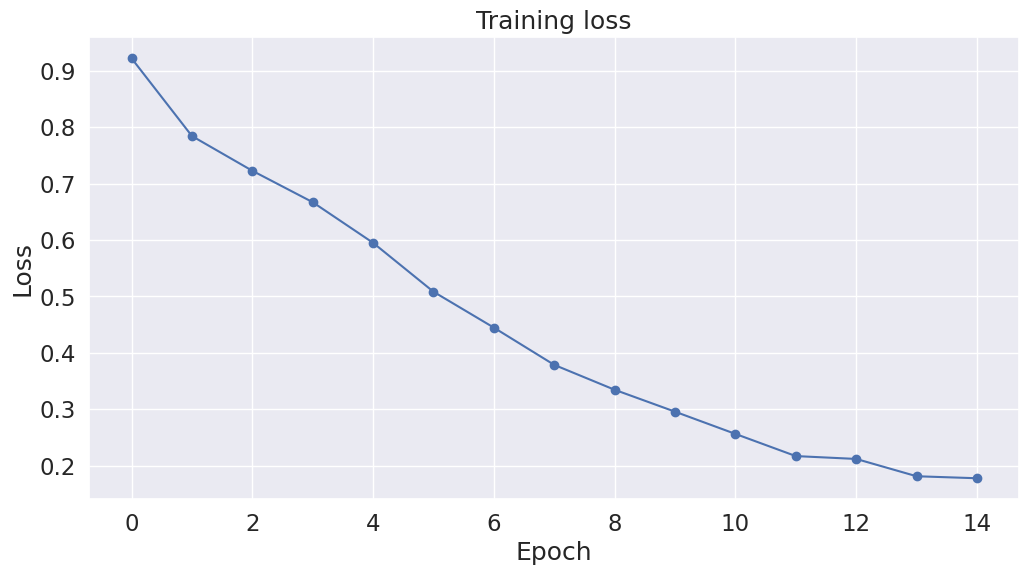

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(loss_values, 'b-o')

plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [ ]:
print("Predicting labels for {:,} test sentences".format(len(test_input)))

model.eval()

prediction, true_labels = [], []

for batch in test_dataloader:
  batch = tuple(t.to(device) for t in batch)

  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask)
    
  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  prediction.append(logits)
  true_labels.append(label_ids)

print(" DONE.")

Predicting labels for 600 test sentences
 DONE.


In [ ]:
from sklearn.metrics import matthews_corrcoef

flat_prediction = [item for sublist in prediction for item in sublist]
flat_prediction = np.argmax(flat_prediction, axis=1).flatten()

flat_true_labels = [item for sublist in true_labels for item in sublist]

mcc = matthews_corrcoef(flat_true_labels, flat_prediction)

print("MCC: %.3f" %mcc)

MCC: 0.381


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(flat_true_labels, flat_prediction)

print("ACC: %.3f" %acc)


ACC: 0.658


In [ ]:
flat_prediction, test_labels

(array([1, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
        2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
        2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2,
        2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2,
        2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1,
        1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
        2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1,
        2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1,
        1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
        2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2,
        1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, flat_prediction))
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(test_labels, flat_prediction)
print(cm)

              precision    recall  f1-score   support

           0       0.44      0.16      0.24        75
           1       0.69      0.54      0.61       207
           2       0.66      0.85      0.74       318

    accuracy                           0.66       600
   macro avg       0.60      0.52      0.53       600
weighted avg       0.64      0.66      0.63       600

[[ 12   9  54]
 [  9 112  86]
 [  6  41 271]]
